In [1]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords

2018-05-08 21:48:56,307 : INFO : 'pattern' package not found; tag filters are not available for English
/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('/home/nikita/PycharmProjects/natural_language/data/test_prepocess.csv')
data.head()

,stars,text,useful,funny
0,3,The good: mini doughnuts and americano friendl...,1,0
1,3,I really like the décor of the place and the w...,0,0
2,5,"Great service, clean and great food, this plac...",1,0
3,5,This place has never failed on me! \nLate nigh...,0,0
4,2,This is a fast food spin off from Paramount Fi...,1,1


In [3]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

In [11]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy                     %s' % accuracy_score(target, predictions))
    print('explained_variance_score     %s' % explained_variance_score(target, predictions))
    print('mean_absolute_error          %s' % mean_absolute_error(target, predictions))
    print('mean_squared_error           %s' % mean_squared_error(target, predictions))
    print('mean_squared_log_error       %s' % mean_squared_log_error(target, predictions))
    print('r2_score                     %s' % r2_score(target, predictions))
    print()
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')
    
def plot_confusion_matrix(cm, title='Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    my_tags = pd.unique(train_batch.stars)
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('Исходные метки')
    plt.xlabel('Полученные метки')
    
def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data.text)
    predictions = classifier.predict(data_features)
    target = data.stars
    evaluate_prediction(predictions, target)

In [6]:
train_batch = train_data[0:100000]
test_batch = test_data[0:50000]

In [7]:
%%time
n_gram_vectorizer = HashingVectorizer(
    analyzer="char",
    ngram_range=([2,5]),
    tokenizer=nltk.word_tokenize,
    n_features=3000,
    preprocessor=None)

logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

CPU times: user 41 µs, sys: 5 µs, total: 46 µs
Wall time: 50.1 µs


In [8]:
%%time
train_data_features = n_gram_vectorizer.fit_transform(train_batch.text)

CPU times: user 2min 2s, sys: 2.07 s, total: 2min 4s
Wall time: 2min 4s


In [9]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=3, C=1e5)
logreg = logreg.fit(train_data_features, train_batch.stars)

/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(self.n_jobs))


CPU times: user 4min 20s, sys: 605 ms, total: 4min 21s
Wall time: 4min 21s


accuracy                     0.63348
explained_variance_score     0.5557120452518454
mean_absolute_error          0.50552
mean_squared_error           0.92068
mean_squared_log_error       0.06358237582833161
r2_score                     0.5485036702718644

confusion matrix
 [[ 5368   539   218   232   517]
 [ 1314   991   815   546   390]
 [  490   620  1876  2107   829]
 [  256   226   953  5185  5088]
 [  308    76   258  2544 18254]]
(row=expected, col=predicted)
CPU times: user 59.9 s, sys: 864 ms, total: 1min
Wall time: 1min 1s


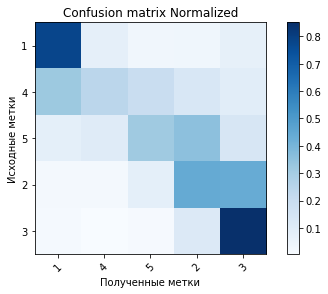

In [12]:
%%time
predict(n_gram_vectorizer, logreg, test_batch)